Some of the techniques/concepts, which have been used in this solution, have not been covered in our course **SHALA-2020**. These concepts will be covered soon as the course progresses. 

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# importing some important packages

import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv as csv
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# reading the dataset
train = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv')
print('-'*30)
print('size of training set: {}'.format(train.shape))
print('-'*30)

------------------------------
size of training set: (1028, 34)
------------------------------


In [4]:
# print the columns' names to decide the data type of each column numerical/categorical
train.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'ID'],
      dtype='object')

In [5]:
# to figure out the type of each column
print(train.dtypes)

Age                          int64
Attrition                    int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [0]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField','Gender', 
                       'JobRole','MaritalStatus', 'OverTime']
numerical_columns = ['Age', 'DailyRate','DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                     'HourlyRate','JobInvolvement', 'JobLevel', 'JobSatisfaction',
                     'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                     'PercentSalaryHike', 'PerformanceRating',
                     'RelationshipSatisfaction', 'StockOptionLevel',
                     'TotalWorkingYears','TrainingTimesLastYear', 
                     'WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']#,'ID','EmployeeCount','EmployeeNumber'
outputs = ['Attrition']
# Dropping the irrelevant columns
#train=train.drop(['Attrition'],axis=1)
train=train.drop(['ID'],axis=1)
train=train.drop(['EmployeeCount'],axis=1)
train=train.drop(['EmployeeNumber'],axis=1)

In [7]:
# converting the categorical and the numerical training data into tensors
for category in categorical_columns:
    train[category] = train[category].astype('category')
    
BusinessTravel = train['BusinessTravel'].cat.codes.values
Department = train['Department'].cat.codes.values
EducationField = train['EducationField'].cat.codes.values
Gender = train['Gender'].cat.codes.values
JobRole = train['JobRole'].cat.codes.values
MaritalStatus = train['MaritalStatus'].cat.codes.values
OverTime = train['OverTime'].cat.codes.values

categorical_data = np.stack([BusinessTravel, Department, EducationField, Gender, 
                       JobRole, MaritalStatus, OverTime],1)

# convert the categorical data into a tensor

categorical_data = torch.tensor(categorical_data, dtype = torch.int64)
# implementing One-hot encoding increases the accuracy
categorical_data = torch.nn.functional.one_hot(categorical_data)


print('type of the categorical data \n {}'.format(type(categorical_data)))
print('shape of the categorical data \n {}'.format(categorical_data.shape))
print('sample of the categorical data after converting to tensor \n {}'.format(categorical_data[:5]))

numerical_data = np.stack([train[col].values for col in numerical_columns],1)
numerical_data = torch.tensor(numerical_data,dtype = torch.int64)#torch.long)# dtype = torch.float)
print('-*'*30)
print('type of the numerical data \n {}'.format(type(numerical_data)))
print('shape of the numerical data \n {}'.format(numerical_data.shape))
print('sample of the numerical data after converting to tensor \n {}'.format(numerical_data[:2]))
outputs = torch.tensor(train[outputs].values)
print('-*'*30)
print('output type :{}'.format(type(outputs)))
print('output shape :{}'.format(outputs.shape))
print(outputs[:5])
categorical_data=categorical_data.view(categorical_data.shape[0],categorical_data.shape[1]*categorical_data.shape[2])
print(categorical_data.shape)

type of the categorical data 
 <class 'torch.Tensor'>
shape of the categorical data 
 torch.Size([1028, 7, 9])
sample of the categorical data after converting to tensor 
 tensor([[[0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 1, 0, 0, 0, 

In [8]:
# concatenate the numerical and the catigorical data in one tensor to form the final data set
data = torch.cat([categorical_data,  numerical_data], dim=1)
#data = np.array(data)
x = data.numpy()
print('type of the data{}'.format(type(x)))
print('size of the data{}'.format(x.shape))
y = outputs.numpy()
print('type of the output{}'.format(type(y)))
print('size of the output{}'.format(y.shape))

type of the data<class 'numpy.ndarray'>
size of the data(1028, 86)
type of the output<class 'numpy.ndarray'>
size of the output(1028, 1)


In [0]:
# implementing different classifiers
# import the important packages
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [10]:
# dividing the dataset into training and validation datasets
# I tried many values of the size of validation set, the value 20% gives the best results
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size= 0.2, random_state=42,shuffle=True)
print('the size of the training set{}'.format(x_train.shape))
print('the size of the validation set{}'.format(x_val.shape))

the size of the training set(822, 86)
the size of the validation set(206, 86)


In [0]:
# # Cross Validation
# from sklearn.model_selection import KFold 
# n_splits = 5
# kf = KFold(n_splits=5, random_state=42) 
# Total_Acc = 0.0
# for train_index, test_index in kf.split(x):
#     #print("Train:", train_index, "Validation:",test_index)
#     x_train, x_val = x[train_index], x[test_index] 
#     y_train, y_val = y[train_index], y[test_index]
#     clf = AdaBoostClassifier()
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_val)
#     Acc = accuracy_score(y_val, y_pred)
#     Total_Acc =Total_Acc + Acc
# print('validation accuracy = {}'.format(Total_Acc/n_splits))

In [0]:
# building the classifier
# Deep Learning------It gave very low accuracy I guess because the training dataset size is small ---val_acc=0.85
# clf = MLPClassifier(hidden_layer_sizes=(10,5,3), activation='relu', solver='adam', alpha=0.3, batch_size=200, learning_rate=  'adaptive', learning_rate_init=0.01
#                     , max_iter=200, shuffle=True, random_state=42, momentum=0.9, nesterovs_momentum=True,
#                     early_stopping=True, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=100,verbose=False)# accuracy = 0.88

# # Random Forest Classifier
# clf = RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
#                              max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=False, oob_score=False, n_jobs=None, random_state=None,
#                               verbose=1, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)# accuracy = 0.88

# #Support Vector Machine-----I tried various values of the parameters but the accuracy was low for all
# clf = svm.SVC(C=0.01, kernel='rbf', degree=3, gamma=0.1, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
#               max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None) # accuracy = 0.85

# rng = np.random.RandomState(1)
#clf = AdaBoostClassifier(RandomForestClassifier(n_estimators = 1000, max_depth = 3),n_estimators=10000, random_state=47)

## I got the best results for AdaBoost classifier with the default values of the free parameters, 
## this ensemble classifier combines multiple classifiers to increase the accuracy of classifiers
## It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
## Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
## This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
clf = AdaBoostClassifier() #accuracy = 0.91414

#clf = GradientBoostingClassifier()# accuracy= 0.859

#clf = HistGradientBoostingClassifier()# accuracy = 0.854

# svc=svm.SVC(probability=True, kernel='rbf')
# clf = AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)# accuracy = 0.85

# clf = GaussianNB() #accuracy = 0.37


# for ploy
# clf = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.01, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False,
#               max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

# # Decision Tree Classifier
# clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#                              max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
#                              class_weight=None, presort='deprecated', ccp_alpha=0.0) #accuracy = 0.83


In [13]:
# training and testing the classifier
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
print('the prediction array:\n {}'.format(y_pred))

the prediction array:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# computing the validation accuracy
accuracy_score(y_val, y_pred)
#clf.score(x_val, y_val)

0.8689320388349514

In [15]:
# computing the confusion matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[170,   7],
       [ 20,   9]])

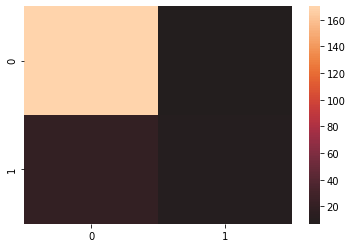

In [16]:
sns.heatmap(cm, center=True)
plt.show()